<a href="https://colab.research.google.com/github/Nick-Kipkoech100/Student-percentage-prediction/blob/main/The_Sparks_Foundation_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**
**Prediction using supervised machine learning**

Predicting the scores of a student depending on the number of hours studied


# **linear Regression with Python Scikit Learn**
In this section I will use Scikit learn to implement regression funtions. This will be a simple regression function with two variables.

# **Simple Linear Regression**
I will be using regression to predict the performance of students based in the number of hours spent studying. This task will involve two variable; hours spent studying and scores of the students.

In [ ]:
#importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading the data from the remote link
url =  "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported succesfully")

s_data.head(15)

Data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Data Eploration**

Perfom Explaratory Data Analysis on the dataset. I will first visualize the data to have a better understanding of the datset

In [ ]:
s_data.shape

(25, 2)

We can see that the data has 25 rows and 2 columns, the two columns mean we will be perfoming a simple regression model with two variables

In [ ]:
#More information on the data
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Use the describe method to get more information on the data set and get basic statistics .

In [ ]:
#Statistics about the data
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check for missing values in the data

In [ ]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see from the result that there are no missing values in the data, we can now continue and analyze the data

# Ploting the **data**
I will plot the data on a 2-D graph to have a general visualization to better understand it and see if we can manually generate relationships.

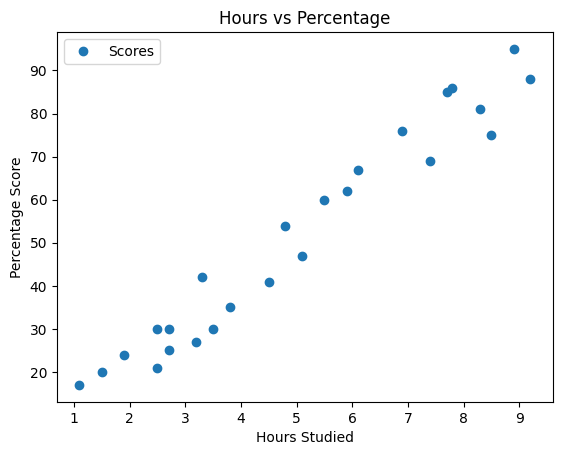

In [ ]:
#Plotting data points to show the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# **Plot a regression line for the dataset**
Using seaborn to plot a regression line of the dataset

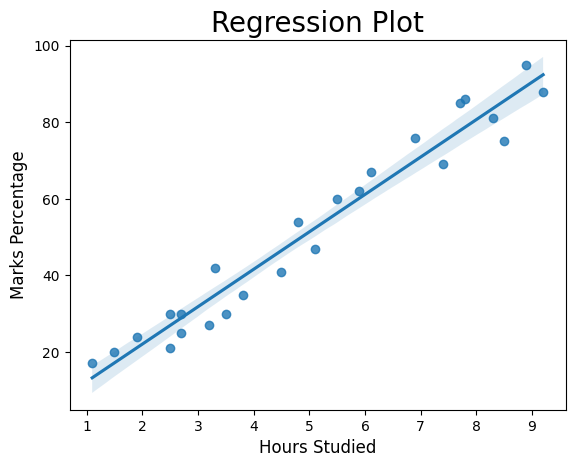

In [ ]:
#Regression line plotting

sns.regplot(x=s_data['Hours'],y=s_data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# **Outlier detection**
Checking for outlier detection using scatter plots


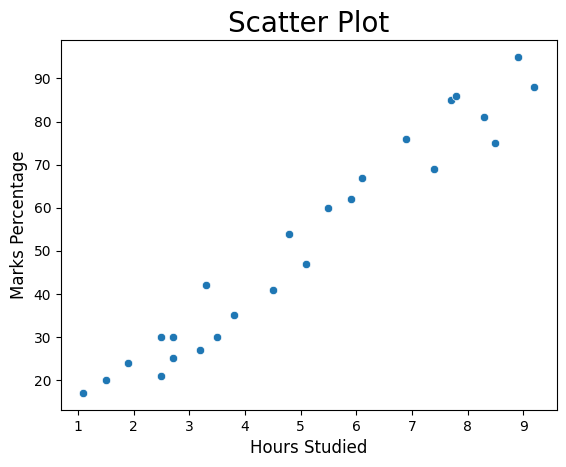

In [ ]:
#Scatter plots for outlier detection
sns.scatterplot(x=s_data['Hours'],y=s_data['Scores'])
plt.title('Scatter Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()



From the scatter plot we can see that our dataset has no outliers and we can begin the analysis.

# Preparing the **data**
We prepare the data by dividing into 'attributes' (inputs) and 'labels' (outputs).

In [ ]:
x= s_data.iloc[:, :-1].values
y= s_data.iloc[:, 1].values

After obtaining the attrubutes and labels, the next step is to plit the data into training and test sets. We will utilise Scikit-Learn's built-in train library train_test_split()method:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size= 0.2, random_state=0)

# **Train the algorithm**
After splitting the data into testing and training set we train the algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


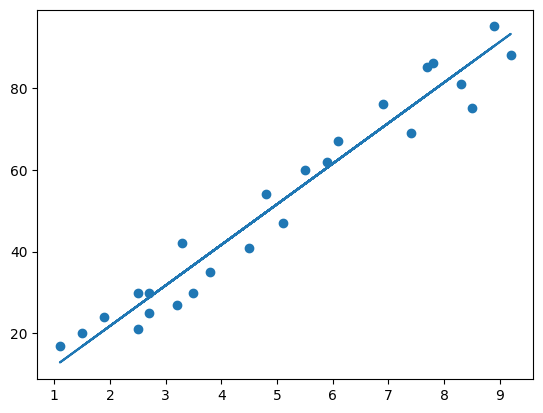

In [ ]:
#Plotting Regression line
line = regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

# **Making Predictions**
After sucessfully training our model we can begin to make predictions

In [ ]:
print(x_test)#Testing data-In hours
y_pred = regressor.predict(x_test)#Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Predicting scores**

Predicting the score of a student who studied for 8.5 hour per day to test the model

In [ ]:
#You can also test with your own data
hours = 8.5
own_pred = regressor.predict([[hours]])
print("No of Hours) = {}".format(hours))
print("Predicted Score) = {}".format(own_pred[0]))

No of Hours) = 8.5
Predicted Score) = 86.25874012689371


# **Evaluating The Model**
We evaluate the performance of the algorithm to compare how well different algorithms perfomr on a particular datasets. we can choose the mean square error, mean absolute error and Root mean squared error for this purpose.


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:')
print(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error')
print(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error:
4.183859899002982
Mean Squared Error
21.598769307217456
Root Mean Squared Error
4.647447612100373
